<img src="https://github.com/AmsterdamUMC/AmsterdamUMCdb/blob/master/img/logo_c4i_square.png?raw=1" alt="Logo C4I" width=128px/>

<img src="https://github.com/AmsterdamUMC/AmsterdamUMCdb/blob/master/img/logo_amds.png?raw=1" alt="Logo AMDS" width=128px/>

# AmsterdamUMCdb with Google BigQuery and Colaboratory
## AmsterdamUMCdb - Freely Accessible ICU Database
## Task 2: DL model for septic patients

# Libraries

In [1]:
!pip install keras --quiet

In [2]:
!pip install lime --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
!pip install tensorflow --quiet

In [4]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf

# Train-test split

In [7]:
df.describe()

,admissionid,time,steroids,antibiotics,admissioncount,gender,age,weight,sofa_resp,sofa_cns,...,Leucocyten,Thrombocyten,Bilirubine,Kreatinine,Lactaat,Breathing Rate Spontaneous,Sodium,Calcium,HR,Saturation
count,55529.000000,55529.000000,55529.000000,55529.000000,55529.000000,55529.000000,55529.000000,55529.000000,55529.000000,55529.000000,...,5.552900e+04,55529.000000,55529.000000,55529.000000,55529.000000,55529.000000,55529.000000,55529.000000,55529.000000,55529.000000
mean,12144.419384,164.907130,0.351096,0.872589,1.150768,0.401466,56.416575,71.126258,0.420321,17.960435,...,4.172303e+02,236.206469,22.012570,123.589044,1.914299,15.341875,142.191648,4.157478,89.411803,97.230276
std,6684.116227,150.765077,0.477317,0.333436,0.467650,0.490199,17.472973,20.440044,0.618877,10.927056,...,5.477353e+04,171.941634,52.363768,99.479112,2.018998,10.274632,6.341496,0.491417,19.424117,3.252930
min,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,-0.800000,0.000000,0.000000,1.700000,0.000000,1.000000
25%,6409.000000,40.000000,0.000000,1.000000,1.000000,0.000000,50.000000,60.000000,0.000000,18.000000,...,8.800000e+00,113.000000,5.000000,64.000000,1.000000,11.000000,138.000000,3.800000,76.000000,96.000000
50%,12645.000000,120.000000,0.000000,1.000000,1.000000,0.000000,60.000000,70.000000,0.000000,18.000000,...,1.250000e+01,201.000000,9.000000,91.000000,1.400000,16.000000,142.000000,4.100000,88.000000,98.000000
75%,17853.000000,248.000000,1.000000,1.000000,1.000000,1.000000,70.000000,80.000000,1.000000,18.000000,...,1.780000e+01,315.000000,17.000000,147.000000,2.100000,24.000000,146.000000,4.400000,102.000000,99.000000
max,23535.000000,712.000000,1.000000,1.000000,5.000000,1.000000,80.000000,110.000000,2.000000,72.000000,...,7.452101e+06,1351.000000,926.000000,1724.000000,38.099998,44.000000,177.000000,7.500000,206.000000,398.000000


In [8]:
from sklearn.model_selection import train_test_split

id_list = list(df['admissionid'].unique())
SPLIT_SIZE = 0.2
len(id_list)

2809

In [9]:
id_train, id_test_val = train_test_split(id_list, test_size = SPLIT_SIZE, random_state = 42) # train set is 80%)
print("train is %d" % len(id_train))
# remaining 20% split in halves as test and validation 10% and 10%
id_valid, id_test = train_test_split(id_test_val, test_size = 0.5, random_state = 42) # test 10% valid 10%
print("val and test are %d" %len(id_test))

train is 2247
val and test are 281


In [10]:
train = df[df.admissionid.isin(id_train)].sort_values(by=['admissionid'])
test = df[df.admissionid.isin(id_test)].sort_values(by=['admissionid'])
validation = df[df.admissionid.isin(id_valid)].sort_values(by=['admissionid'])

test = test.sort_values(by=['admissionid', 'time'], ignore_index = True)
train = train.sort_values(by=['admissionid', 'time'], ignore_index = True)
validation = validation.sort_values(by=['admissionid', 'time'], ignore_index = True)

In [11]:
train.columns

Index(['admissionid', 'time', 'steroids', 'antibiotics', 'admissioncount',
       'gender', 'age', 'weight', 'sofa_resp', 'sofa_cns', 'sofa_cardio',
       'deceased', 'LOS', 'dose_drug', 'Hematocrit', 'Hemoglobine',
       'Leucocyten', 'Thrombocyten', 'Bilirubine', 'Kreatinine', 'Lactaat',
       'Breathing Rate Spontaneous', 'Sodium', 'Calcium', 'HR', 'Saturation'],
      dtype='object')

# LSTM

https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-lime

https://github.com/Amario1306619051/Patient-Mortality-Prediction-Using-LSTM?tab=readme-ov-file

## Pad variable length sequences

In [12]:
col_x = ['admissionid', 'time','steroids', 'antibiotics', 'admissioncount',
       'gender', 'age', 'weight', 'sofa_resp', 'sofa_cns', 'sofa_cardio',
       'dose_drug', 'Hematocrit', 'Hemoglobine',
       'Leucocyten', 'Thrombocyten', 'Bilirubine', 'Kreatinine', 'Lactaat',
       'Breathing Rate Spontaneous', 'Sodium', 'Calcium', 'HR', 'Saturation']
col_y = ['admissionid', 'time', "deceased"]

x_train = train[col_x]
y_train = train[col_y]
x_validation = validation[col_x]
y_validation = validation[col_y]
x_test = test[col_x]
y_test = test[col_y]

x_train.set_index(['admissionid','time'], append=True, inplace=True)
y_train.set_index(['admissionid','time'], append=True, inplace=True)
x_validation.set_index(['admissionid','time'], append=True, inplace=True)
y_validation.set_index(['admissionid','time'], append=True, inplace=True)
x_test.set_index(['admissionid','time'], append=True, inplace=True)
y_test.set_index(['admissionid','time'], append=True, inplace=True)

In [13]:
from tensorflow.keras.preprocessing import sequence

# max number of sequence length
maxlen = 90 # 720 hours max LOS divided by 8 hours timestep

# get a list of unique patient encounter IDs
teId = x_train.index.levels[1]
veId = x_validation.index.levels[1]
teeId = x_test.index.levels[1]

# pad every patient sequence with 0s to be the same length,
# then transforms the list of sequences to one numpy array
# this is for efficient minibatching and GPU computations
X_train = [x_train.loc[(slice(None), patient), :].values for patient in teId]
y_train = [y_train.loc[(slice(None), patient), :].values for patient in teId]

X_train = sequence.pad_sequences(X_train, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_train = sequence.pad_sequences(y_train, dtype='float32', maxlen=maxlen, padding='post', truncating='post')

# repeat for the validation data

X_valid = [x_validation.loc[(slice(None), patient), :].values for patient in veId]
y_valid = [y_validation.loc[(slice(None), patient), :].values for patient in veId]

X_valid = sequence.pad_sequences(X_valid, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_valid = sequence.pad_sequences(y_valid, dtype='float32', maxlen=maxlen, padding='post', truncating='post')

X_test = [x_test.loc[(slice(None), patient), :].values for patient in teeId]
y_test = [y_test.loc[(slice(None), patient), :].values for patient in teeId]

X_test = sequence.pad_sequences(X_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_test = sequence.pad_sequences(y_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')


In [14]:
# print the shape of the array which will be used by the network
# the shape is of the form (# of encounters, length of sequence, # of features)
print("X_train shape: %s | y_train shape: %s" % (str(X_train.shape), str(y_train.shape)))
print("X_valid shape: %s | y_valid shape: %s" % (str(X_valid.shape), str(y_valid.shape)))
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))

X_train shape: (2247, 90, 22) | y_train shape: (2247, 90, 1)
X_valid shape: (281, 90, 22) | y_valid shape: (281, 90, 1)
X_test shape: (281, 90, 22) | y_test shape: (281, 90, 1)


ix = 1027


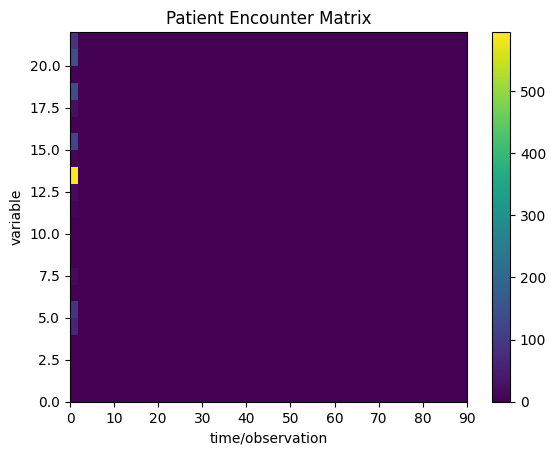

In [15]:
import matplotlib.pyplot as plt
# figure out how many encounters we have
numencnt = X_train.shape[0]

# choose a random patient encounter to plot
ix = random.randint(0,numencnt) #Try a few different index values between 0 and 4999
print('ix = {}'.format(ix))

# plot a matrix of observation values
plt.title("Patient Encounter Matrix")
plt.pcolor(np.transpose(X_train[ix,:,:]))
plt.ylabel("variable")
plt.xlabel("time/observation")
plt.ylim(0,22)
plt.colorbar()
plt.show()

## LSTM

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Masking
from tensorflow.keras.optimizers import RMSprop

# construct inputs
x = Input((90, X_train.shape[-1]) , name='input')
mask = Masking(0, name='input_masked')(x)

# stack LSTMs
lstm_kwargs = {'dropout': 0.25, 'recurrent_dropout': 0.3, 'return_sequences': True}
lstm1 = LSTM(90, name='lstm1', **lstm_kwargs)(mask)

# output: sigmoid layer
output = TimeDistributed(Dense(1, activation='sigmoid'), name='output')(lstm1)
model = Model(inputs=x, outputs=output)

# compile model
optimizer = RMSprop(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='binary_crossentropy')

# print layer shapes and model parameters
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 90, 22)]          0         
                                                                 
 input_masked (Masking)      (None, 90, 22)            0         
                                                                 
 lstm1 (LSTM)                (None, 90, 90)            40680     
                                                                 
 output (TimeDistributed)    (None, 90, 1)             91        
                                                                 
Total params: 40771 (159.26 KB)
Trainable params: 40771 (159.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, batch_size=128, validation_data=(X_valid, y_valid), epochs=50, verbose=1, callbacks=[callback])

Epoch 1/50
18/18 [==============================] - 16s 563ms/step - loss: 0.5111 - val_loss: 0.5758
Epoch 2/50
18/18 [==============================] - 9s 480ms/step - loss: 0.5120 - val_loss: 0.5422
Epoch 3/50
18/18 [==============================] - 11s 628ms/step - loss: 0.5040 - val_loss: 0.5507
Epoch 4/50
18/18 [==============================] - 8s 426ms/step - loss: 0.5066 - val_loss: 0.5563
Epoch 5/50
18/18 [==============================] - 11s 626ms/step - loss: 0.5114 - val_loss: 0.5921
Epoch 6/50
18/18 [==============================] - 9s 495ms/step - loss: 0.5056 - val_loss: 0.5580
Epoch 7/50
18/18 [==============================] - 10s 533ms/step - loss: 0.5061 - val_loss: 0.5713


In [ ]:
from datetime import datetime
today_date = datetime.now().strftime('%d-%m-%Y')
# Save the model
model.save(f'/drive/My Drive/MASTER/SEGUNDO/MAM12A ML AND REASONING FOR HEALTH/MAM12A project/models_LSTM_ana/LSTM_checkpoint_{today_date}')

## Test + ROC

In [16]:
model = tf.keras.models.load_model('/drive/My Drive/MASTER/SEGUNDO/MAM12A ML AND REASONING FOR HEALTH/MAM12A project/models_LSTM_ana/LSTM_checkpoint_12-12-2023')

In [17]:
# Generate model results on the holdout validation set
preds = model.predict(X_test)

9/9 [==============================] - 1s 32ms/step


In [18]:
len(preds)

281

In [19]:
preds.shape

(281, 90, 1)

In [20]:
sum(y_test[:, 0, :].squeeze())

69.0

In [21]:
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, log_loss, precision_score, recall_score
# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze()

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

print(f"AUC: {rnn_auc}")
thresholds = rnn_roc[2]
# Finding best threshold using Youden's J statistic
optimal_idx = np.argmax(rnn_roc[1]-rnn_roc[0])
optimal_threshold = thresholds[optimal_idx]

accuracy = accuracy_score(label, prediction>=optimal_threshold)
f1 = f1_score(label, prediction>=optimal_threshold)
nll = log_loss(label, prediction>=optimal_threshold)
precision = precision_score(label, prediction>=optimal_threshold)
recall = recall_score(label, prediction>=optimal_threshold)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Negative Log-Likelihood: {nll:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

AUC: 0.8349056603773585
Accuracy: 0.8185
F1 Score: 0.6531
Negative Log-Likelihood: 6.5417
Precision: 0.6154
Recall: 0.6957


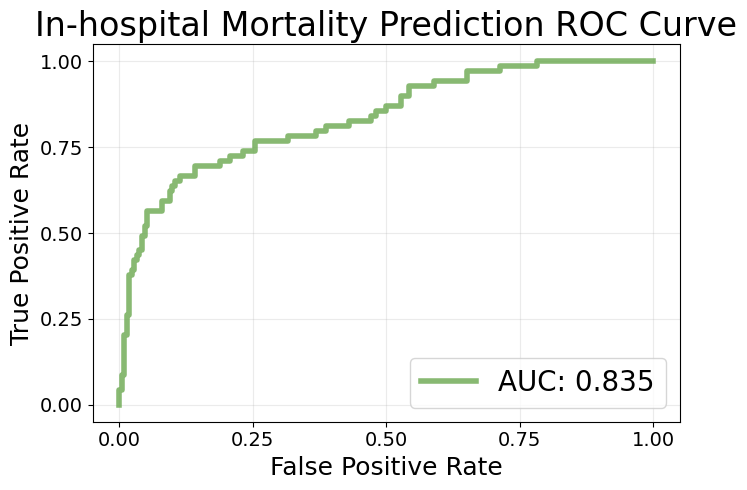

In [22]:
# plot rocs & display AUCs
plt.figure(figsize=(7, 5))
line_kwargs = {'linewidth': 4, 'alpha': 0.8}
plt.plot(rnn_roc[0], rnn_roc[1], label='AUC: %0.3f' % rnn_auc, color='#6AA84F', **line_kwargs)
plt.legend(loc='lower right', fontsize=20)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.title("In-hospital Mortality Prediction ROC Curve", fontsize=24)
plt.grid(alpha=0.25)
plt.tight_layout()

## Performance by subgroup

### By gender

 'steroids',
 'antibiotics',
 'admissioncount',
 'gender',
 'age',
 'weight',
 'sofa_resp',
 'sofa_cns',
 'sofa_cardio',
 'dose_drug',
 'Hematocrit',
 'Hemoglobine',
 'Leucocyten',
 'Thrombocyten',
 'Bilirubine',
 'Kreatinine',
 'Lactaat',
 'Breathing Rate Spontaneous',
 'Sodium',
 'Calcium',
 'HR',
 'Saturation'

In [ ]:
woman_subgroup = test[test['gender']==1]
x_test = woman_subgroup[col_x]
y_test = woman_subgroup[col_y]

In [ ]:
x_test.set_index(['admissionid','time'], append=True, inplace=True)
y_test.set_index(['admissionid','time'], append=True, inplace=True)

teeId = x_test.index.levels[1]

X_test = [x_test.loc[(slice(None), patient), :].values for patient in teeId]
y_test = [y_test.loc[(slice(None), patient), :].values for patient in teeId]

X_test = sequence.pad_sequences(X_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_test = sequence.pad_sequences(y_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))

X_test shape: (109, 90, 22) | y_test shape: (109, 90, 1)


In [ ]:
# Generate model results on the holdout validation set
preds = model.predict(X_test)
# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze()

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

print(rnn_auc)
thresholds = rnn_roc[2]
# Finding best threshold using Youden's J statistic
optimal_idx = np.argmax(rnn_roc[1]-rnn_roc[0])
optimal_threshold = thresholds[optimal_idx]

accuracy = accuracy_score(label, prediction>=optimal_threshold)
f1 = f1_score(label, prediction>=optimal_threshold)
nll = log_loss(label, prediction>=optimal_threshold)
precision = precision_score(label, prediction>=optimal_threshold)
recall = recall_score(label, prediction>=optimal_threshold)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Negative Log-Likelihood: {nll:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

4/4 [==============================] - 0s 27ms/step
0.8098223615464996
Accuracy: 0.8624
F1 Score: 0.6809
Negative Log-Likelihood: 4.9601
Precision: 0.6400
Recall: 0.7273


In [ ]:
man_subgroup = test[test['gender']==0]
x_test = man_subgroup[col_x]
y_test = man_subgroup[col_y]

In [ ]:
x_test.set_index(['admissionid','time'], append=True, inplace=True)
y_test.set_index(['admissionid','time'], append=True, inplace=True)

teeId = x_test.index.levels[1]

X_test = [x_test.loc[(slice(None), patient), :].values for patient in teeId]
y_test = [y_test.loc[(slice(None), patient), :].values for patient in teeId]

X_test = sequence.pad_sequences(X_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_test = sequence.pad_sequences(y_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))

X_test shape: (172, 90, 22) | y_test shape: (172, 90, 1)


In [ ]:
# Generate model results on the holdout validation set
preds = model.predict(X_test)
# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze()

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

print(rnn_auc)
thresholds = rnn_roc[2]
# Finding best threshold using Youden's J statistic
optimal_idx = np.argmax(rnn_roc[1]-rnn_roc[0])
optimal_threshold = thresholds[optimal_idx]

accuracy = accuracy_score(label, prediction>=optimal_threshold)
f1 = f1_score(label, prediction>=optimal_threshold)
nll = log_loss(label, prediction>=optimal_threshold)
precision = precision_score(label, prediction>=optimal_threshold)
recall = recall_score(label, prediction>=optimal_threshold)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Negative Log-Likelihood: {nll:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

6/6 [==============================] - 0s 27ms/step
0.8471489361702128
Accuracy: 0.8198
F1 Score: 0.6737
Negative Log-Likelihood: 6.4962
Precision: 0.6667
Recall: 0.6809


### By age group

In [23]:
young_subgroup = test[test['age']<25]
x_test = young_subgroup[col_x]
y_test = young_subgroup[col_y]
x_test.set_index(['admissionid','time'], append=True, inplace=True)
y_test.set_index(['admissionid','time'], append=True, inplace=True)

teeId = x_test.index.levels[1]

X_test = [x_test.loc[(slice(None), patient), :].values for patient in teeId]
y_test = [y_test.loc[(slice(None), patient), :].values for patient in teeId]

X_test = sequence.pad_sequences(X_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_test = sequence.pad_sequences(y_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))
# Generate model results on the holdout validation set
preds = model.predict(X_test)
# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze()

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

print(f"AUC: {rnn_auc}")
thresholds = rnn_roc[2]
# Finding best threshold using Youden's J statistic
optimal_idx = np.argmax(rnn_roc[1]-rnn_roc[0])
optimal_threshold = thresholds[optimal_idx]

accuracy = accuracy_score(label, prediction>=optimal_threshold)
f1 = f1_score(label, prediction>=optimal_threshold)
nll = log_loss(label, prediction>=optimal_threshold)
precision = precision_score(label, prediction>=optimal_threshold)
recall = recall_score(label, prediction>=optimal_threshold)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Negative Log-Likelihood: {nll:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

X_test shape: (30, 90, 22) | y_test shape: (30, 90, 1)
1/1 [==============================] - 0s 45ms/step
AUC: 0.9821428571428572
Accuracy: 0.9667
F1 Score: 0.8000
Negative Log-Likelihood: 1.2015
Precision: 0.6667
Recall: 1.0000


In [24]:
middleage_subgroup = test[(test['age']>=25) & (test['age']<=60)]
x_test = middleage_subgroup[col_x]
y_test = middleage_subgroup[col_y]
x_test.set_index(['admissionid','time'], append=True, inplace=True)
y_test.set_index(['admissionid','time'], append=True, inplace=True)

teeId = x_test.index.levels[1]

X_test = [x_test.loc[(slice(None), patient), :].values for patient in teeId]
y_test = [y_test.loc[(slice(None), patient), :].values for patient in teeId]

X_test = sequence.pad_sequences(X_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_test = sequence.pad_sequences(y_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))
# Generate model results on the holdout validation set
preds = model.predict(X_test)
# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze()

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

print(f"AUC: {rnn_auc}")
thresholds = rnn_roc[2]
# Finding best threshold using Youden's J statistic
optimal_idx = np.argmax(rnn_roc[1]-rnn_roc[0])
optimal_threshold = thresholds[optimal_idx]

accuracy = accuracy_score(label, prediction>=optimal_threshold)
f1 = f1_score(label, prediction>=optimal_threshold)
nll = log_loss(label, prediction>=optimal_threshold)
precision = precision_score(label, prediction>=optimal_threshold)
recall = recall_score(label, prediction>=optimal_threshold)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Negative Log-Likelihood: {nll:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

X_test shape: (143, 90, 22) | y_test shape: (143, 90, 1)
5/5 [==============================] - 0s 28ms/step
AUC: 0.8037267080745343
Accuracy: 0.8811
F1 Score: 0.6792
Negative Log-Likelihood: 4.2849
Precision: 0.7200
Recall: 0.6429


In [25]:
old_subgroup = test[test['age']>60]
x_test = old_subgroup[col_x]
y_test = old_subgroup[col_y]
x_test.set_index(['admissionid','time'], append=True, inplace=True)
y_test.set_index(['admissionid','time'], append=True, inplace=True)

teeId = x_test.index.levels[1]

X_test = [x_test.loc[(slice(None), patient), :].values for patient in teeId]
y_test = [y_test.loc[(slice(None), patient), :].values for patient in teeId]

X_test = sequence.pad_sequences(X_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_test = sequence.pad_sequences(y_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))
# Generate model results on the holdout validation set
preds = model.predict(X_test)
# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze()

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

print(f"AUC: {rnn_auc}")
thresholds = rnn_roc[2]
# Finding best threshold using Youden's J statistic
optimal_idx = np.argmax(rnn_roc[1]-rnn_roc[0])
optimal_threshold = thresholds[optimal_idx]

accuracy = accuracy_score(label, prediction>=optimal_threshold)
f1 = f1_score(label, prediction>=optimal_threshold)
nll = log_loss(label, prediction>=optimal_threshold)
precision = precision_score(label, prediction>=optimal_threshold)
recall = recall_score(label, prediction>=optimal_threshold)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Negative Log-Likelihood: {nll:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


X_test shape: (108, 90, 22) | y_test shape: (108, 90, 1)
4/4 [==============================] - 0s 27ms/step
AUC: 0.8063916759568934
Accuracy: 0.8056
F1 Score: 0.6557
Negative Log-Likelihood: 7.0085
Precision: 0.9091
Recall: 0.5128


### By admissioncount

In [ ]:
singleadmission_subgroup = test[test['admissioncount']==1]
x_test = singleadmission_subgroup[col_x]
y_test = singleadmission_subgroup[col_y]
x_test.set_index(['admissionid','time'], append=True, inplace=True)
y_test.set_index(['admissionid','time'], append=True, inplace=True)

teeId = x_test.index.levels[1]

X_test = [x_test.loc[(slice(None), patient), :].values for patient in teeId]
y_test = [y_test.loc[(slice(None), patient), :].values for patient in teeId]

X_test = sequence.pad_sequences(X_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_test = sequence.pad_sequences(y_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))
# Generate model results on the holdout validation set
preds = model.predict(X_test)
# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze()

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

print(f"AUC: {rnn_auc}")
thresholds = rnn_roc[2]
# Finding best threshold using Youden's J statistic
optimal_idx = np.argmax(rnn_roc[1]-rnn_roc[0])
optimal_threshold = thresholds[optimal_idx]

accuracy = accuracy_score(label, prediction>=optimal_threshold)
f1 = f1_score(label, prediction>=optimal_threshold)
nll = log_loss(label, prediction>=optimal_threshold)
precision = precision_score(label, prediction>=optimal_threshold)
recall = recall_score(label, prediction>=optimal_threshold)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Negative Log-Likelihood: {nll:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


X_test shape: (247, 90, 22) | y_test shape: (247, 90, 1)
8/8 [==============================] - 0s 30ms/step
AUC: 0.8387096774193548
Accuracy: 0.8097
F1 Score: 0.6412
Negative Log-Likelihood: 6.8585
Precision: 0.6000
Recall: 0.6885


In [ ]:
multiple_admission_subgroup = test[test['admissioncount']>1]
x_test = multiple_admission_subgroup[col_x]
y_test = multiple_admission_subgroup[col_y]
x_test.set_index(['admissionid','time'], append=True, inplace=True)
y_test.set_index(['admissionid','time'], append=True, inplace=True)

teeId = x_test.index.levels[1]

X_test = [x_test.loc[(slice(None), patient), :].values for patient in teeId]
y_test = [y_test.loc[(slice(None), patient), :].values for patient in teeId]

X_test = sequence.pad_sequences(X_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_test = sequence.pad_sequences(y_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))
# Generate model results on the holdout validation set
preds = model.predict(X_test)
# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze()

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

print(f"AUC: {rnn_auc}")
thresholds = rnn_roc[2]
# Finding best threshold using Youden's J statistic
optimal_idx = np.argmax(rnn_roc[1]-rnn_roc[0])
optimal_threshold = thresholds[optimal_idx]

accuracy = accuracy_score(label, prediction>=optimal_threshold)
f1 = f1_score(label, prediction>=optimal_threshold)
nll = log_loss(label, prediction>=optimal_threshold)
precision = precision_score(label, prediction>=optimal_threshold)
recall = recall_score(label, prediction>=optimal_threshold)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Negative Log-Likelihood: {nll:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


X_test shape: (34, 90, 22) | y_test shape: (34, 90, 1)
2/2 [==============================] - 0s 20ms/step
AUC: 0.7980769230769231
Accuracy: 0.8824
F1 Score: 0.7500
Negative Log-Likelihood: 4.2404
Precision: 0.7500
Recall: 0.7500


### By steroid medication

In [31]:
admission_with_steroid = df[df['steroids'] == 1]['admissionid'].unique()
steroid_subgroup = test[test['admissionid'].isin(admission_with_steroid)]

x_test = steroid_subgroup[col_x]
y_test = steroid_subgroup[col_y]
x_test.set_index(['admissionid','time'], append=True, inplace=True)
y_test.set_index(['admissionid','time'], append=True, inplace=True)

teeId = x_test.index.levels[1]

X_test = [x_test.loc[(slice(None), patient), :].values for patient in teeId]
y_test = [y_test.loc[(slice(None), patient), :].values for patient in teeId]

X_test = sequence.pad_sequences(X_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_test = sequence.pad_sequences(y_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))
# Generate model results on the holdout validation set
preds = model.predict(X_test)
# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze()

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

print(f"AUC: {rnn_auc}")
thresholds = rnn_roc[2]
# Finding best threshold using Youden's J statistic
optimal_idx = np.argmax(rnn_roc[1]-rnn_roc[0])
optimal_threshold = thresholds[optimal_idx]

accuracy = accuracy_score(label, prediction>=optimal_threshold)
f1 = f1_score(label, prediction>=optimal_threshold)
nll = log_loss(label, prediction>=optimal_threshold)
precision = precision_score(label, prediction>=optimal_threshold)
recall = recall_score(label, prediction>=optimal_threshold)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Negative Log-Likelihood: {nll:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


X_test shape: (111, 90, 22) | y_test shape: (111, 90, 1)
4/4 [==============================] - 1s 120ms/step
AUC: 0.8738030095759234
Accuracy: 0.8559
F1 Score: 0.7949
Negative Log-Likelihood: 5.1955
Precision: 0.8857
Recall: 0.7209


In [32]:
admission_with_steroid = df[df['steroids'] == 1]['admissionid'].unique()
no_steroid_subgroup = test[~test['admissionid'].isin(admission_with_steroid)]

x_test = no_steroid_subgroup[col_x]
y_test = no_steroid_subgroup[col_y]
x_test.set_index(['admissionid','time'], append=True, inplace=True)
y_test.set_index(['admissionid','time'], append=True, inplace=True)

teeId = x_test.index.levels[1]

X_test = [x_test.loc[(slice(None), patient), :].values for patient in teeId]
y_test = [y_test.loc[(slice(None), patient), :].values for patient in teeId]

X_test = sequence.pad_sequences(X_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_test = sequence.pad_sequences(y_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))
# Generate model results on the holdout validation set
preds = model.predict(X_test)
# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze()

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

print(f"AUC: {rnn_auc}")
thresholds = rnn_roc[2]
# Finding best threshold using Youden's J statistic
optimal_idx = np.argmax(rnn_roc[1]-rnn_roc[0])
optimal_threshold = thresholds[optimal_idx]

accuracy = accuracy_score(label, prediction>=optimal_threshold)
f1 = f1_score(label, prediction>=optimal_threshold)
nll = log_loss(label, prediction>=optimal_threshold)
precision = precision_score(label, prediction>=optimal_threshold)
recall = recall_score(label, prediction>=optimal_threshold)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Negative Log-Likelihood: {nll:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


X_test shape: (170, 90, 22) | y_test shape: (170, 90, 1)
6/6 [==============================] - 1s 96ms/step
AUC: 0.766826923076923
Accuracy: 0.8353
F1 Score: 0.5000
Negative Log-Likelihood: 5.9366
Precision: 0.4667
Recall: 0.5385


### By quick SOFA at admission

In [35]:
high_sofa_subgroup = test[((test['sofa_resp']>=1)|(test['sofa_cns']>=1)|(test['sofa_cardio']>=1))&(test['time']==0)]
x_test = high_sofa_subgroup[col_x]
y_test = high_sofa_subgroup[col_y]
x_test.set_index(['admissionid','time'], append=True, inplace=True)
y_test.set_index(['admissionid','time'], append=True, inplace=True)

teeId = x_test.index.levels[1]

X_test = [x_test.loc[(slice(None), patient), :].values for patient in teeId]
y_test = [y_test.loc[(slice(None), patient), :].values for patient in teeId]

X_test = sequence.pad_sequences(X_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_test = sequence.pad_sequences(y_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))
# Generate model results on the holdout validation set
preds = model.predict(X_test)
# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze()

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

print(f"AUC: {rnn_auc}")
thresholds = rnn_roc[2]
# Finding best threshold using Youden's J statistic
optimal_idx = np.argmax(rnn_roc[1]-rnn_roc[0])
optimal_threshold = thresholds[optimal_idx]

accuracy = accuracy_score(label, prediction>=optimal_threshold)
f1 = f1_score(label, prediction>=optimal_threshold)
nll = log_loss(label, prediction>=optimal_threshold)
precision = precision_score(label, prediction>=optimal_threshold)
recall = recall_score(label, prediction>=optimal_threshold)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Negative Log-Likelihood: {nll:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


X_test shape: (260, 90, 22) | y_test shape: (260, 90, 1)
9/9 [==============================] - 1s 103ms/step
AUC: 0.6538584183673469
Accuracy: 0.5962
F1 Score: 0.4560
Negative Log-Likelihood: 14.5561
Precision: 0.3411
Recall: 0.6875


In [36]:
low_sofa_subgroup = test[((test['sofa_resp']==0)&(test['sofa_cns']==0)&(test['sofa_cardio']==0))&(test['time']==0)]
x_test = low_sofa_subgroup[col_x]
y_test = low_sofa_subgroup[col_y]
x_test.set_index(['admissionid','time'], append=True, inplace=True)
y_test.set_index(['admissionid','time'], append=True, inplace=True)

teeId = x_test.index.levels[1]

X_test = [x_test.loc[(slice(None), patient), :].values for patient in teeId]
y_test = [y_test.loc[(slice(None), patient), :].values for patient in teeId]

X_test = sequence.pad_sequences(X_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_test = sequence.pad_sequences(y_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))
# Generate model results on the holdout validation set
preds = model.predict(X_test)
# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze()

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

print(f"AUC: {rnn_auc}")
thresholds = rnn_roc[2]
# Finding best threshold using Youden's J statistic
optimal_idx = np.argmax(rnn_roc[1]-rnn_roc[0])
optimal_threshold = thresholds[optimal_idx]

accuracy = accuracy_score(label, prediction>=optimal_threshold)
f1 = f1_score(label, prediction>=optimal_threshold)
nll = log_loss(label, prediction>=optimal_threshold)
precision = precision_score(label, prediction>=optimal_threshold)
recall = recall_score(label, prediction>=optimal_threshold)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Negative Log-Likelihood: {nll:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


X_test shape: (21, 90, 22) | y_test shape: (21, 90, 1)
1/1 [==============================] - 0s 45ms/step
AUC: 0.6125
Accuracy: 0.4762
F1 Score: 0.4762
Negative Log-Likelihood: 18.8800
Precision: 0.3125
Recall: 1.0000
